In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import cv2
from utils import show_box, show_mask, show_points

In [40]:
image = cv2.imread('../Dataset/WhatsApp Image 2024-03-18 at 8.19.23 PM.jpeg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

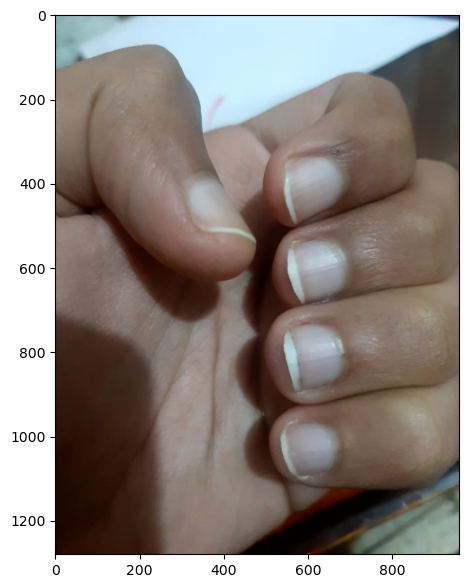

In [41]:
plt.figure(figsize=(7,7))
plt.imshow(image)
plt.axis('on')
plt.show()

In [42]:
import os
from segment_anything import sam_model_registry, SamPredictor
device = torch.device("mps")
sam_checkpoint = '../workdir/ck/SAM_checkpoint/sam_vit_b_01ec64.pth'
sam = sam_model_registry['vit_b'](ck=sam_checkpoint, enc_adapter=False).to(device=device)

predictor = SamPredictor(sam)


*******interpolate
*******load ../workdir/ck/SAM_checkpoint/sam_vit_b_01ec64.pth


In [43]:
predictor.set_image(image)

In [44]:
input_point = np.array([[350, 460], [600, 820]])
input_box = np.array([490, 0, 600, 1024])
input_label = np.array([1, 1])

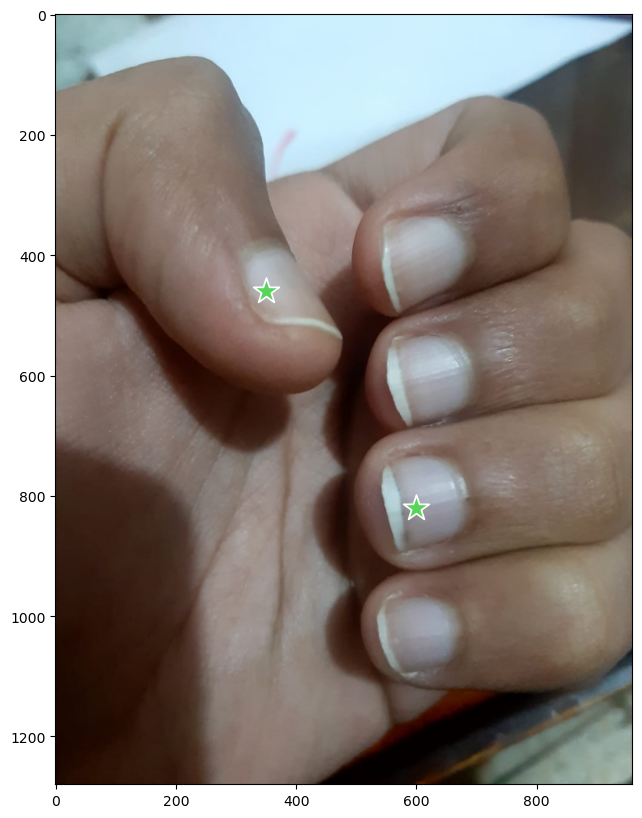

In [45]:
plt.figure(figsize=(10,10))
plt.imshow(image)
show_points(input_point, input_label, plt.gca())
# show_box(input_box, plt.gca())
plt.axis('on')
plt.show()  

In [46]:
masks, scores, logits = predictor.predict(
    point_coords=input_point,
    point_labels=input_label,
    # box=input_box,
    multimask_output=False,
)
masks.shape 

(1, 1280, 959)

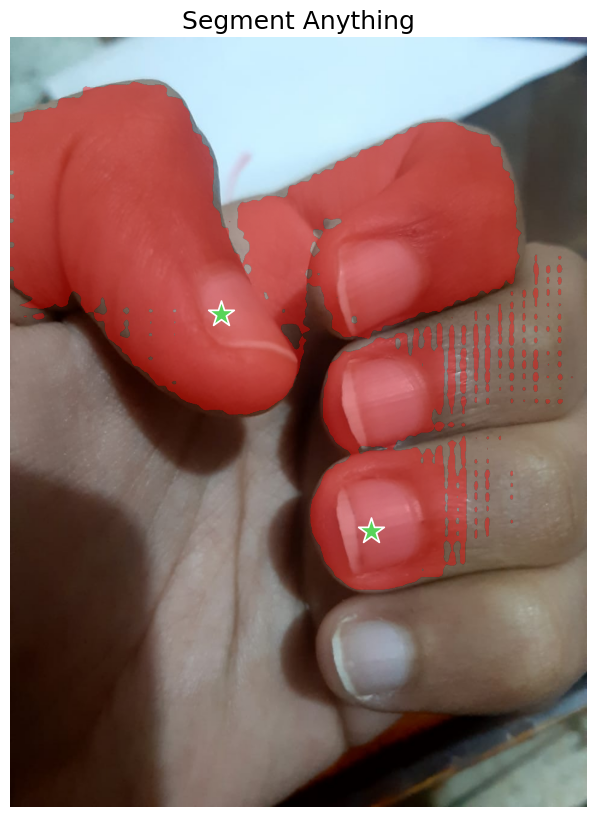

In [47]:
for i, (mask, score) in enumerate(zip(masks, scores)):
    plt.figure(figsize=(10,10))
    plt.imshow(image)
    show_mask(mask, plt.gca())
    show_points(input_point, input_label, plt.gca())
    # show_box(input_box, plt.gca())
    plt.title(f"Segment Anything", fontsize=18)
    plt.axis('off')
    plt.show()  

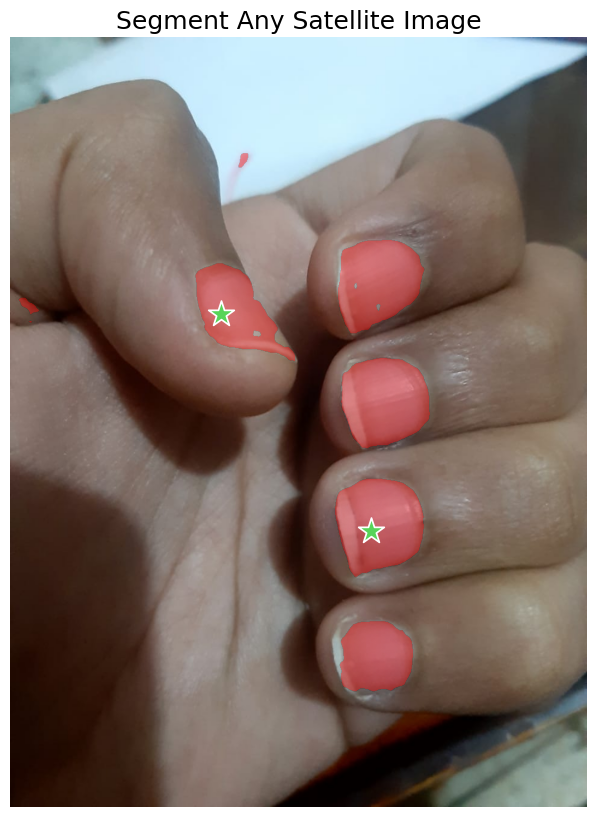

In [48]:
def plot_epoch(ck):
    checkpoint_file = os.path.join(ck)
    loc = 'mps:{}'.format('mps')
    checkpoint = torch.load(checkpoint_file, map_location=loc)
    start_epoch = checkpoint['epoch']
    sam.load_state_dict(checkpoint['state_dict'],strict=False)

    predictor = SamPredictor(sam)
    predictor.set_image(image)

    masks, scores, logits = predictor.predict(
        point_coords=input_point,
        point_labels=input_label,
        # box=input_box,
        multimask_output=False,
    )
    masks.shape 

    for i, (mask, score) in enumerate(zip(masks, scores)):
        plt.figure(figsize=(10,10))
        plt.imshow(image)
        show_mask(mask, plt.gca())
        show_points(input_point, input_label, plt.gca())
        plt.title(f"Segment Any Satellite Image", fontsize=18)
        plt.axis('off')
        plt.show()  

plot_epoch('../workdir/sam-satellite-models/checkpoint_best.pth')